In [62]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [63]:
df = pd.read_csv("realEstateRates.csv")
df['bedrooms']=[3,2,math.nan,4,5]
df['age']=[20,10,17,30,10]
df.head()


,area,price,bedrooms,age
0,2500,550000,3.0,20
1,3000,570000,2.0,10
2,3200,620000,NaN,17
3,3800,690000,4.0,30
4,4200,730000,5.0,10


In [64]:
# check for missing data.
median_bedrooms = math.floor(df.bedrooms.median())
df.bedrooms.fillna(median_bedrooms, inplace=True)
df.head(3)

,area,price,bedrooms,age
0,2500,550000,3.0,20
1,3000,570000,2.0,10
2,3200,620000,3.0,17


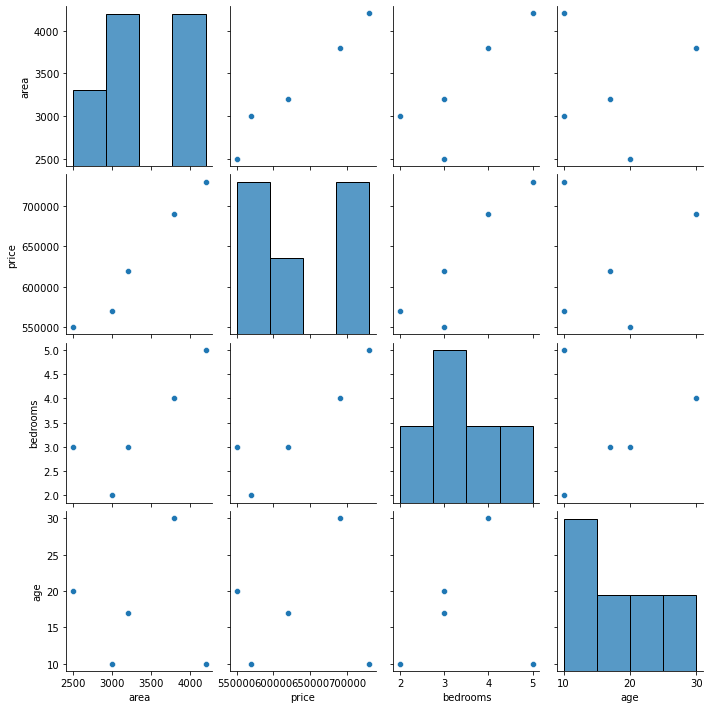

In [65]:
sns.pairplot(df)

## The above model looks suitable for linear regression
## we use linear model --> y = mx + c  
## m is called slope (or gradient) or coefficient
## c is called intercept

# For single variable

In [74]:
#create linear regression object
regression = linear_model.LinearRegression()
regression.fit(df[['area']],df.price)

m = regression.coef_
c = regression.intercept_
(m,c)

(array([113.05803571]), 254386.16071428568)

In [75]:
#lets predict
#predict() uses m (coefficient) and intercept which it calculated from data that we provided in the file
ar = [[2300]]
regression.predict(ar)

array([514419.64285714])

In [77]:
#lets find out what is m and c (slope/coefficient and intercept)
pred = m*ar[0] + c
pred

array([514419.64285714])

In [80]:
# now predict with list using linear regression model 
df_new = pd.DataFrame({'area':[100,500,800,1100,1500]})

pred_prices  = regression.predict(df_new)
pred_prices

array([265691.96428571, 310915.17857143, 344832.58928571, 378750.        ,
       423973.21428571])

# For Multi Variable

In [81]:
#create linear regression object
regression = linear_model.LinearRegression()
regression.fit(df[['area','bedrooms','age']],df.price)

m = regression.coef_
c = regression.intercept_
(m,c)

(array([   89.85712265, 16546.73771239,   676.34900426]), 263849.8294588272)

In [82]:
#lets predict
#predict() uses m (coefficient) and intercept which it calculated from data that we provided in the file
ar = [[1700,3,10]]
regression.predict(ar)

array([473010.6411405])

In [83]:
#lets find out what is m and c (slope/coefficient and intercept)
pred = ar[0][0]*m[0] + ar[0][1]*m[1] + ar[0][2]*m[2] + c 
pred

473010.6411405043

In [84]:
# now predict with list using linear regression model 
df_new = pd.DataFrame({'area':[100,500,800,1100,1500],'bedroom':[2,3,4,6,3],'age':[10,23,12,15,23]})

pred_prices  = regression.predict(df_new)
pred_prices

array([312692.50719102, 373974.63101806, 410038.66647805, 472118.32571006,
       463831.75366624])